In [1]:
# Importações.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

/home/igor/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Carga dos dados.
petr3 = yf.download('PETR3.SA', start = '2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Verificando os 5 primeiros elementos da base de dados.
petr3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,9.58,9.67,9.00,9.00,4.747638,12710900
2015-01-05,8.64,8.96,8.25,8.27,4.362552,25730600
2015-01-06,8.28,8.53,7.78,8.06,4.251774,29754600
2015-01-07,8.30,8.51,8.08,8.45,4.457505,34128300
2015-01-08,8.60,9.26,8.52,9.02,4.758188,37487300


* Nossa base de dados começa em **`2015-01-02`**.

In [4]:
# Verificando os 5 últimos elementos de nossa base de dados.
petr3.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-12,35.900002,36.500000,35.320000,35.330002,35.330002,15413700
2022-09-13,34.799999,35.310001,34.090000,34.259998,34.259998,25361200
2022-09-14,34.320000,35.189999,34.200001,34.680000,34.680000,11926000
2022-09-15,34.360001,34.880001,34.349998,34.599998,34.599998,9164700
2022-09-16,34.169998,34.580002,34.000000,34.410000,34.410000,34954800


* Nossa base de dados vai até **`2022-09-16`**.

In [5]:
# Verificando a quantidade de observações e atributos.
petr3.shape

(1917, 6)

* Há um total de **1917 registros** e **6 atributos**.
* Os registros correspondem aos dias de funcionamento da bolsa de valores de SP, ou seja, so há dados de dias da semana.

In [6]:
# Metadados dos dados.
petr3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1917 entries, 2015-01-02 to 2022-09-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1917 non-null   float64
 1   High       1917 non-null   float64
 2   Low        1917 non-null   float64
 3   Close      1917 non-null   float64
 4   Adj Close  1917 non-null   float64
 5   Volume     1917 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 104.8 KB


* Todos os atributos são do tipo numérico, especificamente do tipo **`contínuo`**, ou seja, valores reais.

In [7]:
# Verificando a existência de valores ausentes.
petr3.isnull().sum().sum()

0

* **Não há valores ausentes** em nossa base de dados.

In [8]:
# Resumo estatístico.
petr3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1.917000e+03
mean,21.701450,22.065232,21.334851,21.689390,12.632543,1.514514e+07
std,8.315143,8.393672,8.230428,8.326142,6.393046,1.132762e+07
min,5.890000,5.990000,5.670000,5.910000,3.117616,0.000000e+00
25%,14.450000,14.700000,14.170000,14.420000,7.622597,8.281000e+06
50%,22.090000,22.480000,21.740000,22.100000,12.016315,1.256290e+07
75%,29.200001,29.600000,28.760000,29.170000,16.171955,1.846230e+07
max,40.250000,40.509998,39.439999,39.849998,38.270000,1.374106e+08


* O valor de fechamento mais alto registrado foi de **R$ 39,84**, e o mínimo **R$ 5,91**.
* O valor de abertura mais alto registrado foi de **R$ 40,25**, e o mínimo **R$ 5,89**.
* O valor de cotação mais alto que a ação chegou a ter em um dia foi de **R$ 40,50**, e o mais baixo de **R$ 5,99**.
* O valor de cotação mais baixo que a ação chegou a ter em um dia foi de **R$ 39,43**, e o mais baixo de **5,67**.

In [9]:
# Verificando a data na qual a ação teve o preço mais alto em seu fechamento.
petr3[(petr3['Close'] >= 39.84) & (petr3['Close'] <= 40)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-09,39.740002,40.099998,39.439999,39.849998,32.964211,16911500


* **`2022/08/09`** foi o momento em que a ação alcançou o preço mais alto em seu fechamento.

In [10]:
# Verificando a data na qual a ação teve o preço mais baixo em seu fechamento.
petr3[(petr3['Close'] >= 5.85) & (petr3['Close'] < 6.00)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-20,5.93,5.99,5.67,5.93,3.128166,12696100
2016-01-26,6.10,6.24,5.86,5.96,3.143991,13040400
2016-02-11,5.89,6.05,5.78,5.91,3.117616,12812600


* **`2016/02/11`** foi o momento em que a ação alcançou o preço mais baixo em seu fechamento.

In [11]:
# Criando o atributo `price_var`, para noção da variação do preço no dia em questão.
petr3['price_var'] = petr3['High'] - petr3['Low']
petr3.head()

,Open,High,Low,Close,Adj Close,Volume,price_var
Date,,,,,,,
2015-01-02,9.58,9.67,9.00,9.00,4.747638,12710900,0.67
2015-01-05,8.64,8.96,8.25,8.27,4.362552,25730600,0.71
2015-01-06,8.28,8.53,7.78,8.06,4.251774,29754600,0.75
2015-01-07,8.30,8.51,8.08,8.45,4.457505,34128300,0.43
2015-01-08,8.60,9.26,8.52,9.02,4.758188,37487300,0.74


In [12]:
# Calculando o valor médio da variação.
petr3['price_var'].mean()

0.730380798791558

* Em média a ação sofria uma volatilidade/variação de **R$ 0,73** em seu preço por dia.

In [13]:
# Criando uma função para salavar o dataframe em formato csv.
opcao = input('Deseja salvar o DataFrame em formato csv? [s/n]: ')

if opcao == 's':
    petr3.to_csv('petr3.csv')
else:
    print('Caso mude de ideia, execute a célula novamente !')    

Caso mude de ideia, execute a célula novamente !


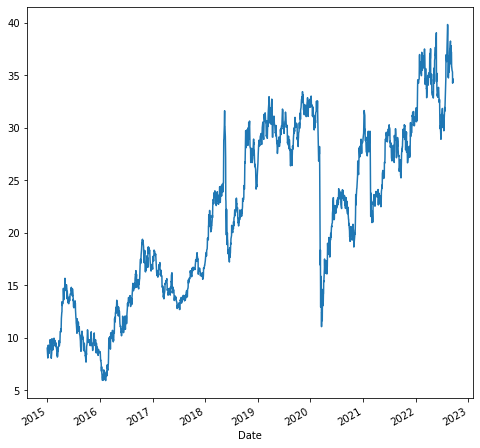

In [14]:
# Plotando o histórico de fechamento da ação.
plt.figure(figsize = (8, 8));
petr3['Close'].plot();

* Em 2020, provavelmente devido a pândemia, a ação teve uma grande desvalorização.

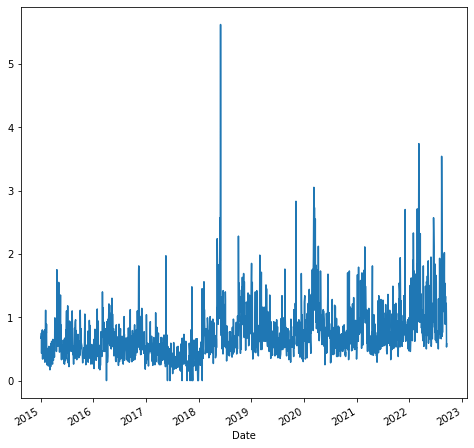

In [15]:
# Plotando a variação de preço histórica.
plt.figure(figsize = (8, 8));
petr3['price_var'].plot();

* O preço da ação **não apresenta** uma estabilidade em seu preço, havendo certos momentos em que há picos de volatilidade/variação.
* Oque é perfeitamente compreensivo ! 

In [16]:
# Criando uma lista com conjunto de diferentes ações.
acoes = ['ABEV3.SA','BBAS3.SA','ITSA3.SA','VALE3.SA',]

As ações escolhidas correspondem a:
* **Ambev, Banco do Brasil, Itaúsa e Vale**.

In [17]:
# Carga de dados.
acoes = yf.download(acoes, start = '2015-01-01')['Close']

[*********************100%***********************]  4 of 4 completed


* A busca será feita pelo **preço de fechamento** das ações.

In [18]:
# Visualizando os 5 primeiros registros.
acoes.head()

,ABEV3.SA,BBAS3.SA,ITSA3.SA,VALE3.SA
Date,,,,
2015-01-02,16.020000,22.650000,6.630748,21.280001
2015-01-05,15.730000,22.180000,6.525498,20.959999
2015-01-06,16.330000,22.490000,6.658815,21.799999
2015-01-07,16.559999,23.480000,6.834232,22.600000
2015-01-08,16.540001,23.559999,6.876332,22.840000


In [19]:
# Visualizando os 5 últimos registros.
acoes.tail()

,ABEV3.SA,BBAS3.SA,ITSA3.SA,VALE3.SA
Date,,,,
2022-09-12,15.70,41.180000,9.61,70.160004
2022-09-13,15.59,40.220001,9.47,68.250000
2022-09-14,15.38,40.259998,9.47,67.000000
2022-09-15,15.30,39.849998,9.45,68.349998
2022-09-16,15.27,39.400002,9.39,68.250000


In [20]:
# Verificando a quantidade de observações e atributos.
acoes.shape

(1918, 4)

* Há um total de **1918 registros** e **4 atributos**.

In [21]:
# Verificando a existência de valores ausentes na base de dados.
acoes.isnull().sum().sum()

4

In [22]:
# Removendo os valores nulos/ausentes.
acoes.dropna(inplace = True)

In [23]:
# Criando uma função para salavar o dataframe em formato csv.
opcao = input('Deseja salvar o DataFrame em formato csv? [s/n]: ')

if opcao == 's':
    acoes.to_csv('acoes.csv')
else:
    print('Caso mude de ideia, execute a célula novamente !')    

Caso mude de ideia, execute a célula novamente !


In [24]:
# Resumo estatístico.
acoes.describe()

,ABEV3.SA,BBAS3.SA,ITSA3.SA,VALE3.SA
count,1917.000000,1917.000000,1917.000000,1917.000000
mean,17.507449,32.443532,9.533778,48.912473
std,2.480418,9.724636,2.352234,27.226616
min,11.030000,12.700000,4.897239,8.600000
25%,15.660000,26.620001,7.314560,26.100000
50%,17.969999,31.860001,9.723809,47.840000
75%,19.100000,37.000000,11.149844,62.200001
max,24.270000,55.180000,15.780952,118.720001


* As empresas `ABEV3` e `ITSA3` são aquelas que possuem a **menor variação** histórica de preço.
* `VALE3` é aquela que tem a **maior variação** em seu preço histórico, bem como a compania com o preço mais caro por ação **R$ 118,72**.
*  `ITSA3` teve o menor preço histórico registrado no valor de **R$ 4,89**.

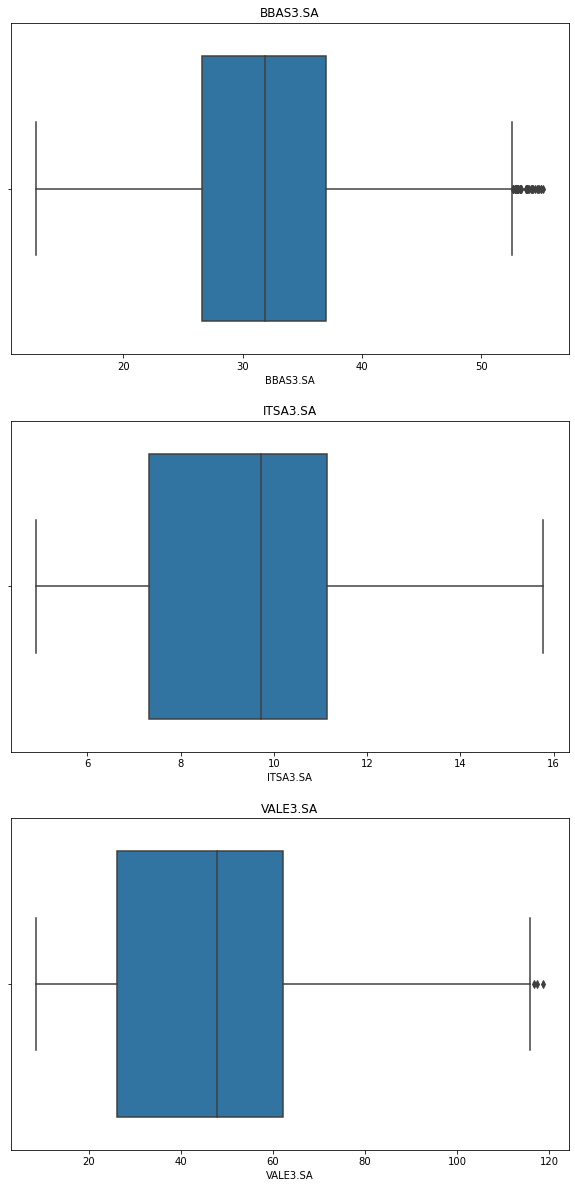

In [25]:
# Plotando o gráfico de caixa para cada ação.
plt.figure(figsize = (10, 50));
for i in range(1, len(acoes.columns)):
    plt.subplot(7, 1, i + 1);
    sns.boxplot(x = acoes[acoes.columns[i]]);
    plt.title(acoes.columns[i]);


In [26]:
acoesn = acoes.copy()
acoesn = [[acoesn[i] / acoesn[i][0]]for i in acoesn.columns[0:]]

In [27]:
acoes[0]

KeyError: 0